In [1]:
library(Seurat)
library(tidyverse)
library(cowplot)
library(patchwork)
library(WGCNA)
library(ggplot2)
library(readxl)  # For reading Excel files
library(dplyr)


Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp



Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots


Loading required package: dynamicTreeCut

Loading required package: fastcluster


Att

Runing PCA

In [49]:
setwd("/Users/alicedecugis/Desktop/capstone")
wt1 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/WT1")
wt2 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/WT2")
mutant1 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/Mutant1")
mutant2 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/Mutant2")

In [50]:
wt1 <- CreateSeuratObject(counts = wt1, project = "Capstone",  min.cells = 3, min.features = 200)
wt2 <- CreateSeuratObject(counts = wt2, project = "Capstone",  min.cells = 3, min.features = 200)
mutant1 <- CreateSeuratObject(counts = mutant1, project = "Capstone",  min.cells = 3, min.features = 200)
mutant2 <- CreateSeuratObject(counts = mutant2, project = "Capstone",  min.cells = 3, min.features = 200)

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


Checks correct format

PCA 

In [51]:
pca_result_wt1 <- readRDS("/Users/alicedecugis/Desktop/capstone/pca_result.rds")
pca_result_wt2 <- readRDS("/Users/alicedecugis/Desktop/capstone/pca_result_wt2.rds")
pca_result_m1 <- readRDS("/Users/alicedecugis/Desktop/capstone/pca_result_m1.rds")
pca_result_m2 <- readRDS("/Users/alicedecugis/Desktop/capstone/pca_result_m2.rds")

marker_table <- read_excel("/Users/alicedecugis/Desktop/capstone/cell_types.xlsx", col_names = TRUE, skip = 1)
colnames(marker_table)

[1] "Astrocyte"       "Oligodendrocyte" "OPC"             "Microglia"      
 [5] "VLMC"            "Ependymal"       "Endothelial"     "Cholinergic"    
 [9] "GABAergic"       "Glutamatergic"   "Neuron"

In [52]:
#head(pca_result_wt1)
head(marker_table)

Astrocyte,Oligodendrocyte,OPC,Microglia,VLMC,Ependymal,Endothelial,Cholinergic,GABAergic,Glutamatergic,Neuron
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1110054M08Rik,0610007P14Rik,Pdgfra,0610031J06Rik,Slc6a13,0610009L18Rik,1110008L16Rik,Nr4a2,Cwh43,Fat2,Fat2
2610017I09Rik,1110020A21Rik,Gm4876,1700017B05Rik,Slc6a20a,1110008J03Rik,1110034G24Rik,Cobll1,Nr4a2,Il16,Il16
2610100L16Rik,1110057K04Rik,Arhgap31,1810011H11Rik,Ranbp3l,1110017D15Rik,2810417H13Rik,Rxfp1,Oprk1,Gm2694,Gm2694
2900052N01Rik,1500004A13Rik,6030443J06Rik,4933406I18Rik,Aldh1a2,1700001O22Rik,4930594C11Rik,Dlc1,Ntng2,Cadps2,Cadps2
9630001P10Rik,1500015L24Rik,Sox6,5430427O19Rik,Col3a1,1700003E16Rik,5430416O09Rik,Etl4,Rxfp1,Adamts18,Adamts18
Aass,1700001P01Rik,Epn2,6230400D17Rik,Igf2,1700003M02Rik,8430408G22Rik,Gpr123,Cntnap3,Grm4,Grm4


In [53]:
# Combine PCA results into a list
pca_list <- list(
  wt1 = pca_result_wt1,
  wt2 = pca_result_wt2,
  m1  = pca_result_m1,
  m2  = pca_result_m2
)

# Extract only PC1 and PC2 from each PCA result
pca_numeric_list <- lapply(pca_list, function(pca_obj) pca_obj$x[, c("PC1", "PC2")])

# Extract individual results if needed
pca_result_wt1_numeric <- pca_numeric_list$wt1
pca_result_wt2_numeric <- pca_numeric_list$wt2
pca_result_m1_numeric  <- pca_numeric_list$m1
pca_result_m2_numeric  <- pca_numeric_list$m2

#head(pca_numeric_list)

PCA k-means

In [ ]:
marker_table <- read_excel("/Users/alicedecugis/Desktop/capstone/cell_types.xlsx", col_names = TRUE, skip = 1)
colnames(marker_table)
  
  # Convert marker table into long format with Cell_Type and Marker columns
  marker_df <- marker_table %>%
    pivot_longer(cols = everything(), names_to = "Cell_Type", values_to = "Marker") 

    head(marker_df)
  

Cell_Type,Marker
<chr>,<chr>
Astrocyte,1110054M08Rik
Oligodendrocyte,0610007P14Rik
OPC,Pdgfra
Microglia,0610031J06Rik
VLMC,Slc6a13
Ependymal,0610009L18Rik


In [55]:
process_pca <- function(pca_result, dataset_name, marker_table) {
  # Create PCA dataframe with first 2 PCs
  pca_df <- data.frame(PC1 = pca_result$x[,1], 
                       PC2 = pca_result$x[,2])
  
  # Perform k-means clustering (assume 11 clusters)
  set.seed(123)
  kmeans_result <- kmeans(pca_df, centers = 11)
  
  # Add cluster assignments
  pca_df$Cluster <- as.factor(kmeans_result$cluster)
  
  # Map cell types based on markers
  # Convert marker table into long format with Cell_Type and Marker columns
  marker_df <- marker_table %>%
    pivot_longer(cols = everything(), names_to = "Cell_Type", values_to = "Marker") 
  
  # For each PCA point, find the cell type that corresponds to the markers present
  pca_df <- pca_df %>%
    rowwise() %>%
    mutate(Cell_Type = {
      matched_types <- marker_df$Cell_Type[marker_df$Marker %in% rownames(pca_result$x)]
      if (length(matched_types) > 0) {
        matched_types[1]  # Take the first matching cell type (if multiple matches, take the first one)
      } else {
        NA  # Assign NA if no match is found
      }
    })

  # Add dataset name column
  pca_df$Dataset <- dataset_name
  
  return(pca_df)
}

# Process all PCA datasets and combine into one dataframe
combined_pca_df <- bind_rows(
  process_pca(pca_result_wt1, "WT1", marker_table),
  process_pca(pca_result_wt2, "WT2", marker_table),
  process_pca(pca_result_m1, "M1", marker_table),
  process_pca(pca_result_m2, "M2", marker_table)
)


Warning message:
"did not converge in 10 iterations"


Cluster,Cell_Type
<fct>,<chr>
1,Astrocyte
2,Oligodendrocyte
3,OPC
4,Microglia
5,VLMC
6,Ependymal


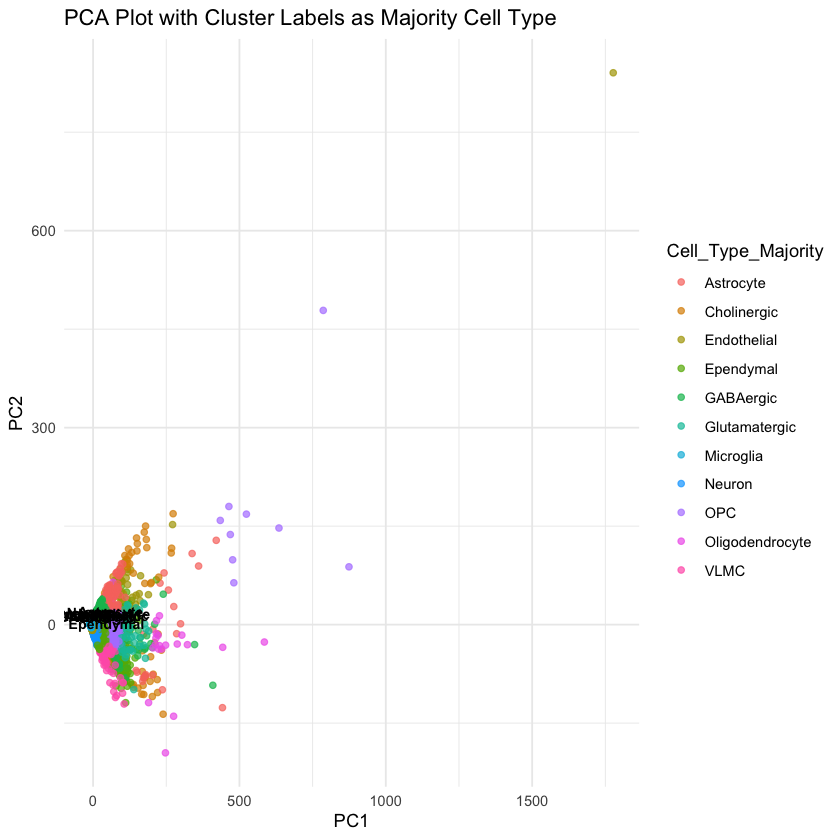

In [56]:
used_cell_types <- c()

# Find the most common cell type in each cluster
cluster_labels <- combined_pca_df %>%
  group_by(Cluster, Cell_Type) %>%
  summarize(count = n(), .groups = 'drop') %>%
  arrange(Cluster, desc(count)) %>%
  distinct(Cluster, .keep_all = TRUE) %>%
  select(Cluster, Cell_Type) %>%
  rowwise() %>%
  mutate(Cell_Type = {
    # Check if the current cell type is already used
    if (Cell_Type %in% used_cell_types) {
      # If it is, find the next available unique cell type
      next_unique <- setdiff(marker_df$Cell_Type, used_cell_types)[1]
      used_cell_types <<- c(used_cell_types, next_unique)  # Add to the list of used types
      next_unique
    } else {
      # Otherwise, use the current cell type and add it to the used list
      used_cell_types <<- c(used_cell_types, Cell_Type)
      Cell_Type
    }
  })

# Merge the labels back into the PCA dataframe
combined_pca_df <- combined_pca_df %>%
  left_join(cluster_labels, by = "Cluster", suffix = c("", "_Majority"))

# Calculate centroids for each cluster
centroids_df <- combined_pca_df %>%
  group_by(Cluster, Cell_Type_Majority) %>%
  summarize(centroid_PC1 = mean(PC1), centroid_PC2 = mean(PC2), .groups = 'drop')

# Plot with cluster labels as the most common cell type
ggplot(combined_pca_df, aes(x = PC1, y = PC2, color = Cell_Type_Majority)) +
  geom_point(alpha = 0.7) +
  geom_text(data = centroids_df, aes(x = centroid_PC1, y = centroid_PC2, label = Cell_Type_Majority), 
            size = 3, fontface = "bold", color = "black", hjust = 0.5, vjust = -0.5) +
  labs(title = "PCA Plot with Cluster Labels as Majority Cell Type", x = "PC1", y = "PC2") +
  theme_minimal() +
  theme(legend.position = "right")

head(cluster_labels)

-------------------

UMAP k-means cluster finding labels

In [57]:
setwd("/Users/alicedecugis/Desktop/capstone")
wt1 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/WT1")
wt2 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/WT2")
mutant1 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/Mutant1")
mutant2 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/Mutant2")

wt1 <- CreateSeuratObject(counts = wt1, project = "Capstone",  min.cells = 3, min.features = 200)
wt2 <- CreateSeuratObject(counts = wt2, project = "Capstone",  min.cells = 3, min.features = 200)
mutant1 <- CreateSeuratObject(counts = mutant1, project = "Capstone",  min.cells = 3, min.features = 200)
mutant2 <- CreateSeuratObject(counts = mutant2, project = "Capstone",  min.cells = 3, min.features = 200)

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [58]:
head(rownames(wt1))

[1] "Plekhg1" "Mthfd1l" "Akap12"  "Zbtb2"   "Rmnd1"   "Gm16153"

In [59]:
# Normalize the data
wt1 <- NormalizeData(wt1)
wt2 <- NormalizeData(wt2)
mutant1 <- NormalizeData(mutant1)
mutant2 <- NormalizeData(mutant2)

# Find variable features
wt1 <- FindVariableFeatures(wt1)
wt2 <- FindVariableFeatures(wt2)
mutant1 <- FindVariableFeatures(mutant1)
mutant2 <- FindVariableFeatures(mutant2)

Normalizing layer: counts

Normalizing layer: counts

Normalizing layer: counts

Normalizing layer: counts

Finding variable features for layer counts

Finding variable features for layer counts

Finding variable features for layer counts

Finding variable features for layer counts



In [60]:
# Optionally, merge the datasets
combined <- merge(wt1, y = c(wt2, mutant1, mutant2), add.cell.ids = c("WT1", "WT2", "Mutant1", "Mutant2"))

# Scale the data and run PCA
combined <- ScaleData(combined)
combined <- RunPCA(combined)

# Run UMAP
combined <- RunUMAP(combined, reduction = "pca", dims = 1:30)

# Visualize the UMAP
#DimPlot(combined, reduction = "umap", group.by = "orig.ident")

Centering and scaling data matrix

PC_ 1 
Positive:  Prph, Spock2, Snhg11, Ebf1, Akap12, Uchl1, Lrba, Bsg, Rgs4, Dgkh 
	   Tmsb10, Rbms1, Stmn2, Anxa2, Ly6c1, Flt1, Ppp1r1c, Scn9a, Gpr116, Pirt 
	   Abcb1a, Ywhah, Pcp4l1, Ly6a, Apold1, Slc17a6, Slco1a4, Gm26871, Ablim1, Tshz2 
Negative:  Ptgds, Enpp2, mt-Tv, Apod, mt-Tm, mt-Th, Mpz, mt-Tf, mt-Tc, Prx 
	   Gfap, 9430041J12Rik, Ctss, Edil3, Rdh5, P2ry12, Csf1r, Ttr, C1qb, Scg3 
	   Cst3, Selplg, Cx3cr1, Siglech, Ogn, Col9a3, C1qa, Laptm5, Ccl3, Lpar1 
PC_ 2 
Positive:  Flt1, Ly6c1, Ly6a, Slco1a4, Abcb1a, Apold1, Gpr116, Itm2a, Klf2, Slco1c1 
	   Igfbp7, Eltd1, Rgs5, Ptprb, Ly6e, Ly6c2, Id1, Abcg2, Palmd, Sdpr 
	   9430020K01Rik, Bsg, Slc2a1, Egfl7, Cldn5, Klf4, Pecam1, Nostrin, Fn1, H2-D1 
Negative:  Snhg11, Meg3, Nap1l5, Stmn3, Snap25, Map1b, Syt4, Gnao1, Kif21a, Ndrg4 
	   Rtn1, Gng3, Bex2, Elavl4, Map1a, Nrxn1, Pcsk1n, Syt1, Nefl, Gria2 
	   Nrxn3, Ank3, Atp1b1, Ctnna2, Scg2, Prph, Tubb3, Soga3, Scg5, Chgb 
PC_ 3 
Positive:  Ctss, C1q

In [75]:
# Convert marker table into long format with Cell_Type and Marker columns
marker_df <- marker_table %>%
  pivot_longer(cols = everything(), names_to = "cell_type", values_to = "cell_name")


In [76]:
# Extract the metadata
metadata_df <- combined@meta.data

# Extract PCA embeddings
pca_embeddings <- Embeddings(combined, reduction = "pca")

# Perform k-means clustering (choose the number of clusters, e.g., k = 11)
set.seed(123)  # For reproducibility
kmeans_result <- kmeans(pca_embeddings, centers = 11)

# Add the k-means clusters to the metadata
combined$kmeans_clusters <- as.factor(kmeans_result$cluster)

# Ensure kmeans_clusters are present
metadata_df$kmeans_clusters <- as.factor(metadata_df$kmeans_clusters)

combined$cell_name <- rownames(combined)

head(metadata_df)

,orig.ident,nCount_RNA,nFeature_RNA,kmeans_clusters,cell_name
,<chr>,<dbl>,<int>,<fct>,<chr>
WT1_CTGGCTTCTGAG,Capstone,228245,12509,5,Plekhg1
WT1_ACTCAACCCTCT,Capstone,208578,12112,5,Mthfd1l
WT1_GTCTCTACACTA,Capstone,166134,11168,5,Akap12
WT1_GCCCGCTTGTTC,Capstone,152013,11149,5,Zbtb2
WT1_AAAATGGTCTCA,Capstone,90549,10121,5,Rmnd1
WT1_TATGATTTACAC,Capstone,80281,9700,5,Gm16153


In [77]:
# Assuming marker_df has cell_name and cell_type columns
# Example: marker_df <- data.frame(cell_name = c("Plekhg1", "Mthfd1l"), cell_type = c("VLMC", "Neuron"))

metadata_df_types <- metadata_df

# Join marker_df with metadata_df based on cell_name
metadata_df_types$cell_name <- rownames(metadata_df_types)

metadata_df_types <- combined@meta.data

# Only join the 'cell_name' and 'cell_type' columns from marker_df
metadata_df_types <- metadata_df_types %>%
  left_join(marker_df %>% select(cell_name, cell_type), by = "cell_name")

# Check the updated metadata
head(metadata_df_types)

,orig.ident,nCount_RNA,nFeature_RNA,kmeans_clusters,cell_name,cell_type
,<chr>,<dbl>,<int>,<fct>,<chr>,<chr>
1,Capstone,228245,12509,5,Plekhg1,Cholinergic
2,Capstone,228245,12509,5,Plekhg1,Neuron
3,Capstone,208578,12112,5,Mthfd1l,NA
4,Capstone,166134,11168,5,Akap12,NA
5,Capstone,152013,11149,5,Zbtb2,NA
6,Capstone,90549,10121,5,Rmnd1,NA


In [ ]:
library(dplyr)

metadata_df_types %>%
  group_by(kmeans_clusters, cell_type) %>%
  tally()


kmeans_clusters,cell_type,n
<fct>,<chr>,<int>
1,Astrocyte,15
1,Cholinergic,13
1,Endothelial,20
1,Ependymal,25
1,GABAergic,30
1,Glutamatergic,37
1,Microglia,23
1,Neuron,66
1,OPC,4


In [ ]:
# Filter out NA cell types
metadata_df_types_filtered <- metadata_df_types %>%
  filter(cell_type != "NA")

# Initialize an empty list to track assigned cell types
assigned_types <- c()

# Assign the most common cell type to each cluster
cluster_assignments <- metadata_df_types_filtered %>%
  arrange(kmeans_clusters, desc(n)) %>%
  group_split(kmeans_clusters) %>%
  map_df(~ {
    cluster <- unique(.x$kmeans_clusters)
    
    # Find the first unassigned cell type
    chosen_type <- .x %>%
      filter(!(cell_type %in% assigned_types)) %>%
      slice_max(n, n = 1, with_ties = FALSE) %>%
      pull(cell_type)
    
    # Update the list of assigned types
    assigned_types <<- c(assigned_types, chosen_type)
    
    tibble(kmeans_clusters = cluster, assigned_cell_type = chosen_type)
  })

# View the final assignments
print(cluster_assignments)


Warning message:
"... is ignored in group_split(<grouped_df>), please use group_by(..., .add =
TRUE) %>% group_split()"


# A tibble: 11 x 2
   kmeans_clusters assigned_cell_type
   <fct>           <chr>             
 1 1               Neuron            
 2 2               Oligodendrocyte   
 3 3               GABAergic         
 4 4               Astrocyte         
 5 5               Endothelial       
 6 6               Glutamatergic     
 7 7               Ependymal         
 8 8               Microglia         
 9 9               VLMC              
10 10              Cholinergic       
11 11              OPC               


UMAP louvain cluster finding labels

In [99]:
# Extract the metadata
metadata_df <- combined@meta.data

# Extract PCA embeddings
pca_embeddings <- Embeddings(combined, reduction = "pca")

# Perform PCA-based neighbor finding (usually using reduced PCA dimensions)
combined <- FindNeighbors(combined, dims = 1:20)  # Using the first 20 dimensions, adjust as needed

# Perform Louvain clustering (using the default resolution)
combined <- FindClusters(combined, resolution = 0.225)  # Adjust resolution as needed

# Add the Louvain clusters to the metadata
combined$louvain_clusters <- as.factor(combined$seurat_clusters)

# Ensure louvain_clusters are present
metadata_df$louvain_clusters <- as.factor(combined$seurat_clusters)

# Assign cell names if needed
combined$cell_name <- rownames(combined)

# View the metadata with louvain clusters
head(metadata_df)
# Print the number of clusters and their sizes
table(combined$seurat_clusters)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6481
Number of edges: 243656

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9524
Number of communities: 11
Elapsed time: 0 seconds


,orig.ident,nCount_RNA,nFeature_RNA,kmeans_clusters,cell_name,RNA_snn_res.0.5,seurat_clusters,louvain_clusters,RNA_snn_res.0.7,RNA_snn_res.0.3,RNA_snn_res.0.2,RNA_snn_res.0.25
,<chr>,<dbl>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
WT1_CTGGCTTCTGAG,Capstone,228245,12509,5,Plekhg1,11,5,5,12,7,4,5
WT1_ACTCAACCCTCT,Capstone,208578,12112,5,Mthfd1l,11,5,5,12,7,4,5
WT1_GTCTCTACACTA,Capstone,166134,11168,5,Akap12,11,5,5,12,7,4,5
WT1_GCCCGCTTGTTC,Capstone,152013,11149,5,Zbtb2,11,5,5,12,7,4,5
WT1_AAAATGGTCTCA,Capstone,90549,10121,5,Rmnd1,11,5,5,12,7,4,5
WT1_TATGATTTACAC,Capstone,80281,9700,5,Gm16153,11,5,5,12,7,4,5



   0    1    2    3    4    5    6    7    8    9   10 
1759  900  820  662  634  520  404  383  252   96   51 

In [91]:
# Assuming marker_df has cell_name and cell_type columns
# Example: marker_df <- data.frame(cell_name = c("Plekhg1", "Mthfd1l"), cell_type = c("VLMC", "Neuron"))

metadata_df_types1 <- metadata_df

# Join marker_df with metadata_df based on cell_name
metadata_df_types1$cell_name <- rownames(metadata_df_types1)

metadata_df_types1 <- combined@meta.data

# Only join the 'cell_name' and 'cell_type' columns from marker_df
metadata_df_types1 <- metadata_df_types1 %>%
  left_join(marker_df %>% select(cell_name, cell_type), by = "cell_name")

# Check the updated metadata
head(metadata_df_types1)

,orig.ident,nCount_RNA,nFeature_RNA,kmeans_clusters,cell_name,RNA_snn_res.0.5,seurat_clusters,louvain_clusters,RNA_snn_res.0.7,RNA_snn_res.0.3,RNA_snn_res.0.2,RNA_snn_res.0.25,cell_type
,<chr>,<dbl>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,Capstone,228245,12509,5,Plekhg1,11,5,5,12,7,4,5,Cholinergic
2,Capstone,228245,12509,5,Plekhg1,11,5,5,12,7,4,5,Neuron
3,Capstone,208578,12112,5,Mthfd1l,11,5,5,12,7,4,5,NA
4,Capstone,166134,11168,5,Akap12,11,5,5,12,7,4,5,NA
5,Capstone,152013,11149,5,Zbtb2,11,5,5,12,7,4,5,NA
6,Capstone,90549,10121,5,Rmnd1,11,5,5,12,7,4,5,NA


In [101]:
metadata_df_types_tally <- metadata_df_types1 %>%
  group_by(louvain_clusters, cell_type) %>%
  tally()

# If you want to view the table
print(metadata_df_types_tally)


# A tibble: 129 x 3
# Groups:   louvain_clusters [12]
   louvain_clusters cell_type           n
   <fct>            <chr>           <int>
 1 0                Astrocyte          25
 2 0                Cholinergic        20
 3 0                Endothelial        35
 4 0                Ependymal          35
 5 0                GABAergic          52
 6 0                Glutamatergic      65
 7 0                Microglia          31
 8 0                Neuron            109
 9 0                OPC                 7
10 0                Oligodendrocyte    55
# i 119 more rows


In [102]:
# Assuming metadata_df_types_tally is already created as per your earlier code
metadata_df_types_tally <- metadata_df_types1 %>%
  group_by(louvain_clusters, cell_type) %>%
  tally()

# Filter out NA cell types
metadata_df_types_filtered <- metadata_df_types_tally %>%
  filter(cell_type != "NA")

# Initialize an empty list to track assigned cell types
assigned_types <- c()

# Assign the most common cell type to each cluster
cluster_assignments <- metadata_df_types_filtered %>%
  arrange(louvain_clusters, desc(n)) %>%
  group_split(louvain_clusters) %>%
  map_df(~ {
    cluster <- unique(.x$louvain_clusters)
    
    # Find the first unassigned cell type
    chosen_type <- .x %>%
      filter(!(cell_type %in% assigned_types)) %>%
      slice_max(n, n = 1, with_ties = FALSE) %>%
      pull(cell_type)
    
    # Update the list of assigned types
    assigned_types <<- c(assigned_types, chosen_type)
    
    tibble(louvain_clusters = cluster, assigned_cell_type = chosen_type)
  })

# View the final assignments
print(cluster_assignments)


Warning message:
"... is ignored in group_split(<grouped_df>), please use group_by(..., .add =
TRUE) %>% group_split()"


# A tibble: 11 x 2
   louvain_clusters assigned_cell_type
   <fct>            <chr>             
 1 0                Neuron            
 2 1                Glutamatergic     
 3 2                Oligodendrocyte   
 4 3                Ependymal         
 5 4                Astrocyte         
 6 5                GABAergic         
 7 6                Microglia         
 8 7                OPC               
 9 8                Cholinergic       
10 9                Endothelial       
11 10               VLMC              


----------------------

Tsne + kmeans

In [3]:
setwd("/Users/alicedecugis/Desktop/capstone")
wt1 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/WT1")
wt2 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/WT2")
mutant1 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/Mutant1")
mutant2 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/Mutant2")

wt1 <- CreateSeuratObject(counts = wt1, project = "Capstone",  min.cells = 3, min.features = 200)
wt2 <- CreateSeuratObject(counts = wt2, project = "Capstone",  min.cells = 3, min.features = 200)
mutant1 <- CreateSeuratObject(counts = mutant1, project = "Capstone",  min.cells = 3, min.features = 200)
mutant2 <- CreateSeuratObject(counts = mutant2, project = "Capstone",  min.cells = 3, min.features = 200)

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [ ]:
# Combine all Seurat objects into one (optional, but makes analysis easier)
combined1 <- merge(wt1, y = c(wt2, mutant1, mutant2), add.cell.ids = c("WT1", "WT2", "Mutant1", "Mutant2"))

# Normalize the data
combined1 <- NormalizeData(combined1)

# Find variable features
combined1 <- FindVariableFeatures(combined1, selection.method = "vst", nfeatures = 2000)

# Scale the data
combined1 <- ScaleData(combined1)

# Run PCA
combined1 <- RunPCA(combined1, features = VariableFeatures(object = combined1))

# Run t-SNE
combined1 <- RunTSNE(combined1, dims = 1:20)

# Visualize t-SNE
#head(combined1)
#DimPlot(combined1, reduction = "tsne", group.by = "orig.ident", label = TRUE, pt.size = 0.5) + ggtitle("t-SNE of Combined Data")

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Centering and scaling data matrix

PC_ 1 
Positive:  Flt1, Ly6c1, Ly6a, Slco1a4, Abcb1a, Apold1, Gpr116, Itm2a, Klf2, Eltd1 
	   Igfbp7, Slco1c1, Ptprb, Rgs5, Bsg, Ly6e, Ly6c2, Palmd, Abcg2, Sdpr 
	   Egfl7, Id1, Pcp4l1, 9430020K01Rik, Cldn5, Klf4, Slc2a1, Lef1, Rundc3b, Hspb1 
Negative:  Aldoc, Slc1a2, Dbi, Ttyh1, Slc4a4, Slc1a3, Ndrg2, Pla2g7, Scg3, Gria4 
	   Gpr37l1, Luzp2, Aqp4, Gria1, Ednrb, Clu, Apoe, Fam213a, Timp4, Gm3764 
	   Ntsr2, Grid2, Gja1, Mt3, Ntrk2, Sdc4, Bai3, Mlc1, Mt1, Gnao1 
PC_ 2 
Positive:  Ctss, C1qb, Laptm5, C1qa, C1qc, Csf1r, Tyrobp, Plek, Fcer1g, Ccl4 
	   Nfkbia, Cd83, Cx3cr1, Ccl3, Siglech, Srgn, Cd14, Aif1, Selplg, Ptprc 
	   Tnfaip3, Il1a, Nfkbiz, Bcl2a1b, P2r

,orig.ident,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>
WT1_CTGGCTTCTGAG,Capstone,228245,12509
WT1_ACTCAACCCTCT,Capstone,208578,12112
WT1_GTCTCTACACTA,Capstone,166134,11168
WT1_GCCCGCTTGTTC,Capstone,152013,11149
WT1_AAAATGGTCTCA,Capstone,90549,10121
WT1_TATGATTTACAC,Capstone,80281,9700
WT1_AATTGCCTAACT,Capstone,48760,8350
WT1_CCAAGCATTAAC,Capstone,48713,8245
WT1_TGAACATTCTTT,Capstone,25544,5999


In [6]:
head(combined1)
rownames(combined1)

,orig.ident,nCount_RNA,nFeature_RNA,kmeans_clusters
,<chr>,<dbl>,<int>,<fct>
WT1_CTGGCTTCTGAG,Capstone,228245,12509,5
WT1_ACTCAACCCTCT,Capstone,208578,12112,5
WT1_GTCTCTACACTA,Capstone,166134,11168,5
WT1_GCCCGCTTGTTC,Capstone,152013,11149,5
WT1_AAAATGGTCTCA,Capstone,90549,10121,5
WT1_TATGATTTACAC,Capstone,80281,9700,5
WT1_AATTGCCTAACT,Capstone,48760,8350,5
WT1_CCAAGCATTAAC,Capstone,48713,8245,11
WT1_TGAACATTCTTT,Capstone,25544,5999,11


[1] "Plekhg1"        "Mthfd1l"        "Akap12"         "Zbtb2"         
    [5] "Rmnd1"          "Gm16153"        "1700052N19Rik"  "Ccdc170"       
    [9] "Esr1"           "Syne1"          "Mtrf1l"         "Rgs17"         
   [13] "Oprm1"          "Ipcef1"         "Ulbp1"          "Lrp11"         
   [17] "Pcmt1"          "Nup43"          "Lats1"          "Katna1"        
   [21] "Ginm1"          "Ppil4"          "Zc3h12d"        "Tab2"          
   [25] "Ust"            "Sash1"          "Samd5"          "Stxbp5"        
   [29] "Shprh"          "Fbxo30"         "Epm2a"          "Gm9797"        
   [33] "Utrn"           "Sf3b5"          "Phactr2"        "Ltv1"          
   [37] "Fuca2"          "Pex3"           "Adat2"          "Aig1"          
   [41] "Hivep2"         "Gpr126"         "Gm10335"        "Vta1"          
   [45] "Txlnb"          "Heca"           "Abracl"         "Reps1"         
   [49] "Ect2l"          "Ccdc28a"        "Nhsl1"          "D10Bwg1379e"   
   [53] "Perp"           "Ifngr1"         "Map3k5"         "Pex7"          
   [57] "Map7"           "Bclaf1"         "Pde7b"          "Ahi1"          
   [61] "Myb"            "Hbs1l"          "Sgk1"           "E030030I06Rik" 
   [65] "Raet1e"         "Slc2a12"        "Tbpl1"          "Eya4"          
   [69] "Rps12"          "Slc18b1"        "Stx7"           "Moxd1"         
   [73] "Gm15270"        "Enpp3"          "Med23"          "Akap7"         
   [77] "Epb4.1l2"       "Arhgap18"       "Lama2"          "Ptprk"         
   [81] "Soga3"          "9330159F19Rik"  "Echdc1"         "Rnf146"        
   [85] "Gm10275"        "Trmt11"         "Ncoa7"          "Hint3"         
   [89] "Hey2"           "Gm5422"         "Hddc2"          "Tpd52l1"       
   [93] "Rnf217"         "Trdn"           "Rsph4a"         "Zufsp"         
   [97] "Rwdd1"          "Trappc3l"       "Fam26e"         "Fam26f"        
  [101] "Dse"            "Tspyl1"         "Nt5dc1"         "Tspyl4"        
  [105] "Frk"            "Amd2"           "Hs3st5"         "Hdac2"         
  [109] "Marcks"         "Lama4"          "Fam229b"        "Tube1"         
  [113] "Fyn"            "Gm16365"        "E130307A14Rik"  "Rev3l"         
  [117] "AA474331"       "AI317395"       "Slc16a10"       "Rpf2"          
  [121] "Gtf3c6"         "Amd1"           "Cdk19"          "Mettl24"       
  [125] "Cdc40"          "Wasf1"          "Fig4"           "Ak9"           
  [129] "Zbtb24"         "Smpd2"          "Cd164"          "Ccdc162"       
  [133] "Cep57l1"        "Sesn1"          "Armc2"          "Foxo3"         
  [137] "Lace1"          "Snx3"           "Ostm1"          "Sec63"         
  [141] "Sobp"           "Pdss2"          "Bend3"          "Gm9803"        
  [145] "1700021F05Rik"  "Cd24a"          "F930017D23Rik"  "Qrsl1"         
  [149] "Rtn4ip1"        "Prdm1"          "Atg5"           "Prep"          
  [153] "Popdc3"         "Lin28b"         "Hace1"          "Grik2"         
  [157] "Ascc3"          "Dcbld1"         "Gopc"           "Nepn"          
  [161] "Nus1"           "Slc35f1"        "Cep85l"         "Mcm9"          
  [165] "Asf1a"          "Fam184a"        "Man1a"          "Tbc1d32"       
  [169] "Msl3l2"         "Pkib"           "Hsf2"           "Serinc1"       
  [173] "Fabp7"          "Smpdl3a"        "Gcc2"           "Lims1"         
  [177] "Ranbp2"         "Ccdc138"        "Sh3rf3"         "Sept10"        
  [181] "Sowahc"         "P4ha1"          "Gm10273"        "Mcu"           
  [185] "Micu1"          "Dnajb12"        "Ddit4"          "Anapc16"       
  [189] "Ascc1"          "Spock2"         "Psap"           "Cdh23"         
  [193] "Slc29a3"        "Unc5b"          "Pcbd1"          "Sgpl1"         
  [197] "Adamts14"       "Pald1"          "Lrrc20"         "Eif4ebp2"      
  [201] "Npffr1"         "Ppa1"           "Sar1a"          "Tysnd1"        
  [205] "Aifm2"          "H2afy2"         "Col13a1"        "Gm5424"        
  [209] "2010107G23Rik"  "Tspan15"        "Hk1"     

In [12]:
marker_table <- read_excel("/Users/alicedecugis/Desktop/capstone/cell_types.xlsx", col_names = TRUE, skip = 1)
colnames(marker_table)
  
  # Convert marker table into long format with Cell_Type and Marker columns
  marker_df <- marker_table %>%
    pivot_longer(cols = everything(), names_to = "cell_type", values_to = "cell_name") 

    head(marker_df)
  

[1] "Astrocyte"       "Oligodendrocyte" "OPC"             "Microglia"      
 [5] "VLMC"            "Ependymal"       "Endothelial"     "Cholinergic"    
 [9] "GABAergic"       "Glutamatergic"   "Neuron"

cell_type,cell_name
<chr>,<chr>
Astrocyte,1110054M08Rik
Oligodendrocyte,0610007P14Rik
OPC,Pdgfra
Microglia,0610031J06Rik
VLMC,Slc6a13
Ependymal,0610009L18Rik


In [15]:
# Add cell names to metadata (if not already set)
combined1$cell_name <- rownames(combined1)

head(combined1)

# Assuming marker_df has columns 'cell_name' and 'cell_type'
combined1@meta.data <- combined1@meta.data %>%
  left_join(marker_df %>% select(cell_name, cell_type), by = "cell_name")

# Check the updated metadata
head(combined1@meta.data)


ERROR: Error in validObject(object = x): invalid class "Seurat" object: 1: all cells in assays must be present in the Seurat object
invalid class "Seurat" object: 2: All cells in reductions must be present in the Seurat object
invalid class "Seurat" object: 3: All cells in reductions must be present in the Seurat object
invalid class "Seurat" object: 4: 'active.idents' must be as long as the number of cells present


In [17]:
# View the metadata for your Seurat object
head(combined1@meta.data)

summary_table <- combined1@meta.data


,orig.ident,nCount_RNA,nFeature_RNA,kmeans_clusters,cell_name,cell_type
,<chr>,<dbl>,<int>,<fct>,<chr>,<chr>
1,Capstone,228245,12509,5,Plekhg1,Cholinergic
2,Capstone,228245,12509,5,Plekhg1,Neuron
3,Capstone,208578,12112,5,Mthfd1l,NA
4,Capstone,166134,11168,5,Akap12,NA
5,Capstone,152013,11149,5,Zbtb2,NA
6,Capstone,90549,10121,5,Rmnd1,NA


In [47]:
library(dplyr)

summary_table_tallied <- summary_table %>%
  group_by(kmeans_clusters, cell_type) %>%  # Group by both cluster and cell type
  tally(name = "n")                         # Tally the count for each combination

summary_table_tallied1 <- summary_table %>%
group_by(kmeans_clusters, cell_type) %>%  # Group by both cluster and cell type
tally(name = "n")   

# View the final tallied table
print(summary_table_tallied)

# A tibble: 114 x 3
# Groups:   kmeans_clusters [11]
   kmeans_clusters cell_type           n
   <fct>           <chr>           <int>
 1 1               Astrocyte           5
 2 1               Cholinergic         2
 3 1               Endothelial         4
 4 1               Ependymal          10
 5 1               GABAergic          10
 6 1               Glutamatergic       7
 7 1               Microglia           4
 8 1               Neuron             14
 9 1               Oligodendrocyte     8
10 1               VLMC                1
# i 104 more rows


In [48]:
library(dplyr)

# Filter out NA cell types
summary_table_filtered <- summary_table %>%
  filter(cell_type != "NA")  # Filter out NA values

# Group by kmeans_clusters and cell_type, then tally
summary_table_tallied <- summary_table_filtered %>%
  group_by(kmeans_clusters, cell_type) %>%
  tally(name = "n")  # Tally the number of occurrences for each cell_type in each cluster

# Find the most frequent cell_type for each kmeans_cluster
cluster_names <- summary_table_tallied %>%
  group_by(kmeans_clusters) %>%   # Group by kmeans_clusters
  slice_max(n, n = 1) %>%         # Get the most frequent cell_type for each cluster
  ungroup() %>%                   # Ungroup to prevent issues with subsequent steps
  distinct(kmeans_clusters, .keep_all = TRUE)  # Ensure no duplicate cluster names

# Print the final result
print(cluster_names)


# A tibble: 11 x 3
   kmeans_clusters cell_type       n
   <fct>           <chr>       <int>
 1 1               Neuron         14
 2 2               Neuron         41
 3 3               Neuron          6
 4 4               Astrocyte       1
 5 5               Endothelial     2
 6 6               Neuron         96
 7 7               Neuron         33
 8 8               Neuron         64
 9 9               Neuron         30
10 10              Neuron         18
11 11              Neuron         28


In [49]:
# Filter out NA cell types
summary_table_tallied1 <- summary_table_tallied1 %>%
  filter(cell_type != "NA")

# Initialize an empty list to track assigned cell types
assigned_types <- c()

# Assign the most common cell type to each cluster
cluster_assignments <- summary_table_tallied1 %>%
  arrange(kmeans_clusters, desc(n)) %>%
  group_split(kmeans_clusters) %>%
  map_df(~ {
    cluster <- unique(.x$kmeans_clusters)
    
    # Find the first unassigned cell type
    chosen_type <- .x %>%
      filter(!(cell_type %in% assigned_types)) %>%
      slice_max(n, n = 1, with_ties = FALSE) %>%
      pull(cell_type)
    
    # Update the list of assigned types
    assigned_types <<- c(assigned_types, chosen_type)
    
    tibble(kmeans_clusters = cluster, assigned_cell_type = chosen_type)
  })

# View the final assignments
print(cluster_assignments)


Warning message:
"... is ignored in group_split(<grouped_df>), please use group_by(..., .add =
TRUE) %>% group_split()"


# A tibble: 11 x 2
   kmeans_clusters assigned_cell_type
   <fct>           <chr>             
 1 1               Neuron            
 2 2               Oligodendrocyte   
 3 3               Ependymal         
 4 4               Astrocyte         
 5 5               Endothelial       
 6 6               Glutamatergic     
 7 7               Microglia         
 8 8               GABAergic         
 9 9               VLMC              
10 10              Cholinergic       
11 11              OPC               


Louvain _ tsne

In [51]:
setwd("/Users/alicedecugis/Desktop/capstone")
wt1 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/WT1")
wt2 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/WT2")
mutant1 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/Mutant1")
mutant2 <- Read10X(data.dir = "/Users/alicedecugis/Desktop/capstone/GSE178693_RAW/Mutant2")

wt1 <- CreateSeuratObject(counts = wt1, project = "Capstone",  min.cells = 3, min.features = 200)
wt2 <- CreateSeuratObject(counts = wt2, project = "Capstone",  min.cells = 3, min.features = 200)
mutant1 <- CreateSeuratObject(counts = mutant1, project = "Capstone",  min.cells = 3, min.features = 200)
mutant2 <- CreateSeuratObject(counts = mutant2, project = "Capstone",  min.cells = 3, min.features = 200)

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [52]:
# Combine all Seurat objects into one (optional, but makes analysis easier)
combined3 <- merge(wt1, y = c(wt2, mutant1, mutant2), add.cell.ids = c("WT1", "WT2", "Mutant1", "Mutant2"))

# Normalize the data
combined3 <- NormalizeData(combined3)

# Find variable features
combined3 <- FindVariableFeatures(combined3, selection.method = "vst", nfeatures = 2000)

# Scale the data
combined3 <- ScaleData(combined3)

# Run PCA
combined3 <- RunPCA(combined3, features = VariableFeatures(object = combined3))

# Run t-SNE
combined3 <- RunTSNE(combined3, dims = 1:20)

# Visualize t-SNE
head(combined3)
#DimPlot(combined1, reduction = "tsne", group.by = "orig.ident", label = TRUE, pt.size = 0.5) + ggtitle("t-SNE of Combined Data")

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Centering and scaling data matrix

PC_ 1 
Positive:  Flt1, Ly6c1, Ly6a, Slco1a4, Abcb1a, Apold1, Gpr116, Itm2a, Klf2, Eltd1 
	   Igfbp7, Slco1c1, Ptprb, Rgs5, Bsg, Ly6e, Ly6c2, Palmd, Abcg2, Sdpr 
	   Egfl7, Id1, Pcp4l1, 9430020K01Rik, Cldn5, Klf4, Slc2a1, Lef1, Rundc3b, Hspb1 
Negative:  Aldoc, Slc1a2, Dbi, Ttyh1, Slc4a4, Slc1a3, Ndrg2, Pla2g7, Scg3, Gria4 
	   Gpr37l1, Luzp2, Aqp4, Gria1, Ednrb, Clu, Apoe, Fam213a, Timp4, Gm3764 
	   Ntsr2, Grid2, Gja1, Mt3, Ntrk2, Sdc4, Bai3, Mlc1, Mt1, Gnao1 
PC_ 2 
Positive:  Ctss, C1qb, Laptm5, C1qa, C1qc, Csf1r, Tyrobp, Plek, Fcer1g, Ccl4 
	   Nfkbia, Cd83, Cx3cr1, Ccl3, Siglech, Srgn, Cd14, Aif1, Selplg, Ptprc 
	   Tnfaip3, Il1a, Nfkbiz, Bcl2a1b, P2r

,orig.ident,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>
WT1_CTGGCTTCTGAG,Capstone,228245,12509
WT1_ACTCAACCCTCT,Capstone,208578,12112
WT1_GTCTCTACACTA,Capstone,166134,11168
WT1_GCCCGCTTGTTC,Capstone,152013,11149
WT1_AAAATGGTCTCA,Capstone,90549,10121
WT1_TATGATTTACAC,Capstone,80281,9700
WT1_AATTGCCTAACT,Capstone,48760,8350
WT1_CCAAGCATTAAC,Capstone,48713,8245
WT1_TGAACATTCTTT,Capstone,25544,5999


In [55]:
# Find neighbors (based on PCA or other reduced dimensions)
combined3 <- FindNeighbors(combined3, dims = 1:20)

# Perform Louvain clustering (using the default resolution)
combined3 <- FindClusters(combined3, resolution = 0.25)  # Adjust resolution as needed

# Add the Louvain clusters to the metadata
combined3$louvain_clusters <- as.factor(combined3$seurat_clusters)

# Assign cell names if needed
combined3$cell_name <- rownames(combined3)

# View the metadata with louvain clusters
#head(metadata_df)
# Print the number of clusters and their sizes
table(combined3$seurat_clusters)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6481
Number of edges: 237554

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9574
Number of communities: 11
Elapsed time: 0 seconds



   0    1    2    3    4    5    6    7    8    9   10 
1253 1177  927  703  592  517  385  322  250  238  117 

In [58]:
# Assuming marker_df has cell_name and cell_type columns
# Example: marker_df <- data.frame(cell_name = c("Plekhg1", "Mthfd1l"), cell_type = c("VLMC", "Neuron"))

metadata_df_types3 <- combined3@meta.data

# Join marker_df with metadata_df based on cell_name
metadata_df_types3$cell_name <- rownames(metadata_df_types3)

metadata_df_types3 <- combined3@meta.data

# Only join the 'cell_name' and 'cell_type' columns from marker_df
metadata_df_types3 <- metadata_df_types3 %>%
  left_join(marker_df %>% select(cell_name, cell_type), by = "cell_name")

# Check the updated metadata
head(metadata_df_types3)

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.225,seurat_clusters,louvain_clusters,cell_name,RNA_snn_res.0.25,cell_type
,<chr>,<dbl>,<int>,<fct>,<fct>,<fct>,<chr>,<fct>,<chr>
1,Capstone,228245,12509,4,5,5,Plekhg1,5,Cholinergic
2,Capstone,228245,12509,4,5,5,Plekhg1,5,Neuron
3,Capstone,208578,12112,4,5,5,Mthfd1l,5,NA
4,Capstone,166134,11168,4,5,5,Akap12,5,NA
5,Capstone,152013,11149,4,5,5,Zbtb2,5,NA
6,Capstone,90549,10121,4,5,5,Rmnd1,5,NA


In [60]:
metadata_df_types_tally <- metadata_df_types3 %>%
  group_by(louvain_clusters, cell_type) %>%
  tally()

# If you want to view the table
print(metadata_df_types_tally)

# A tibble: 125 x 3
# Groups:   louvain_clusters [11]
   louvain_clusters cell_type           n
   <fct>            <chr>           <int>
 1 0                Astrocyte          24
 2 0                Cholinergic        14
 3 0                Endothelial        27
 4 0                Ependymal          32
 5 0                GABAergic          27
 6 0                Glutamatergic      43
 7 0                Microglia          25
 8 0                Neuron             64
 9 0                OPC                 4
10 0                Oligodendrocyte    41
# i 115 more rows


In [63]:
# Assuming metadata_df_types_tally is already created as per your earlier code
metadata_df_types_tally1 <- metadata_df_types3 %>%
  group_by(louvain_clusters, cell_type) %>%
  tally()

# Filter out NA cell types
metadata_df_types_filtered <- metadata_df_types_tally1 %>%
  filter(cell_type != "NA")

# Initialize an empty list to track assigned cell types
assigned_types <- c()

# Assign the most common cell type to each cluster
cluster_assignments <- metadata_df_types_filtered %>%
  arrange(louvain_clusters, desc(n)) %>%
  group_split(louvain_clusters) %>%
  map_df(~ {
    cluster <- unique(.x$louvain_clusters)
    
    # Find the first unassigned cell type
    chosen_type <- .x %>%
      filter(!(cell_type %in% assigned_types)) %>%
      slice_max(n, n = 1, with_ties = FALSE) %>%
      pull(cell_type)
    
    # Update the list of assigned types
    assigned_types <<- c(assigned_types, chosen_type)
    
    tibble(louvain_clusters = cluster, assigned_cell_type = chosen_type)
  })

# View the final assignments
print(cluster_assignments)


Warning message:
"... is ignored in group_split(<grouped_df>), please use group_by(..., .add =
TRUE) %>% group_split()"


# A tibble: 10 x 2
   louvain_clusters assigned_cell_type
   <fct>            <chr>             
 1 0                Neuron            
 2 1                Oligodendrocyte   
 3 2                Glutamatergic     
 4 3                Microglia         
 5 4                GABAergic         
 6 5                Ependymal         
 7 6                Astrocyte         
 8 7                Endothelial       
 9 8                OPC               
10 9                Cholinergic       
